In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [8, 8]

# A Poisson process on a square

Let's simulate a Poisson point process on $[0,1]$:
first, with uniform intensity,
and then with nonuniform intensity.

## Uniform intensity.

To do this, we will

1. pick the total number of points
2. choose their locations uniformly.

In [3]:
lam = 70
num_points = np.random.poisson(lam=lam)
xy = np.array([np.random.uniform(size=num_points),
               np.random.uniform(size=num_points)])

(0, 1)

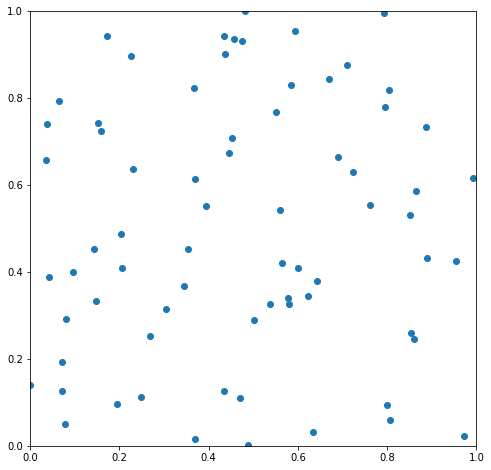

In [4]:
fig, ax = plt.subplots()
ax.scatter(xy[0], xy[1])
ax.set_xlim(0,1)
ax.set_ylim(0,1)

## Nonuniform intensity

Now let's simulate from a Poisson point process
with mean intensity
$$ x^y dx dy . $$

The total number of points is Poisson with mean
$$\begin{aligned}
\int_0^1 \int_0^1 x^y dx dy
  &= \int_0^1 \frac{1^{y+1}}{y+1} dy \\
  &= \log(2) .
\end{aligned}$$

Note that
$$ \int_0^1 x^y dx = \frac{1}{y+1} ,$$
while
$$ \int_0^1 x^y dy = \int_0^1 \exp(y\log x) dy = \frac{x-1}{\log x} . $$

This means that the *marginal* distribution of the $y$ coordinate has density $1/(y+1)$,
and so if a point $(X, Y)$ is chosen form the distribution with this density,
$$  \mathbb{P}\{ Y < u \} = \frac{1}{\log2} \int_0^u \frac{1}{y+1} dy =  \frac{ \log(u+1)}{\log2} , $$
and therefore,
$$ \mathbb{P}\{ Y < 2^{y}-1 \} = y, \qquad \text{for } 0 \le y \le 1 .$$
So, if we let $U$ be Uniform on $[0,1]$ then we can simulate $Y$ by taking
$$  Y = 2^U-1 ,$$
since then
$$\begin{aligned}
  \mathbb{P}\{ Y < y \}
  &= \mathbb{P}\{ 2^U - 1 < y \} \\
  &= \mathbb{P}\{ U < \log(y+1) \} \\
  &= \log(y+1)/\log(2),
\end{aligned}$$
as required.

Similarly, given $Y=y$, the distribution of $X$ has density equal to
$$ \frac{x^y}{y+1} dx, $$
so
$$\begin{aligned}
  \mathbb{P}\{ X < x \vert Y=y \}
  &= \int_0^x \frac{u^y}{y+1} du  \\
  &= x^{y+1} .
\end{aligned}$$
As before, if $V$ is Uniform on $[0,1]$, then we can let
$$
  X = V^{1/(y+1)} .
$$

In [5]:
lam = 2000
num_points = np.random.poisson(lam * np.log(2))
Y = 2 ** np.random.uniform(size=num_points) - 1
X = np.random.uniform(size=num_points) ** (1/(Y+1))
xy = np.array([X, Y])

(0, 1)

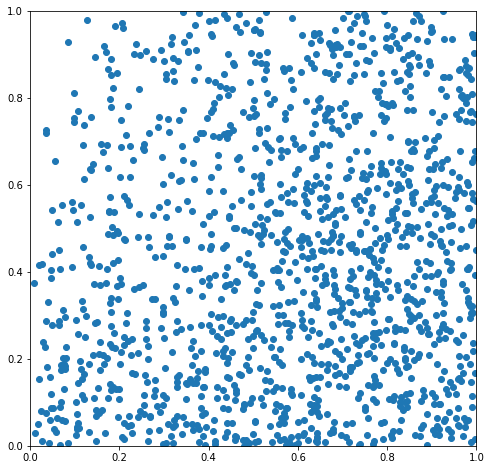

In [6]:
fig, ax = plt.subplots()
ax.scatter(xy[0], xy[1])
ax.set_xlim(0,1)
ax.set_ylim(0,1)